<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com
    
    
    
    
    


<br><font face = "Muller Text" size = "8"> <b> Global Power Plant Database
    
    
    
    

<br><font face = "TImes New Roman" size = "5"> <b> Problem Statement
    



<br><font face = "TImes New Roman" size = "4"> <b> Description
    


The Global Power Plant Database is a comprehensive, open source database of power plants 
around the world. It centralizes power plant data to make it easier to navigate, compare and 
draw insights for one’s own analysis. The database covers approximately 35,000 power plants 
from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, 
geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and 
entries contain information on plant capacity, generation, ownership, and fuel type. It will be 
continuously updated as data becomes available


<br><font face = "TImes New Roman" size = "4"> <b> Key Attributes of the Database 


 `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 
specification [5] 

 `country_long` (text): longer form of the country designation

 `name` (text): name or title of the power plant, generally in Romanized form

 `gppd_idnr` (text): 10 or 12 character identifier for the power plant 

 `capacity_mw` (number): electrical generating capacity in megawatts

 `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

 `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326) 

 `primary_fuel` (text): energy source used in primary electricity generation or export 

 `other_fuel1` (text): energy source used in electricity generation or export

 `other_fuel2` (text): energy source used in electricity generation or export

 `other_fuel3` (text): energy source used in electricity generation or export 

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity 
when data is available

 `owner` (text): majority shareholder of the power plant, generally in Romanized form

 `source` (text): entity reporting the data; could be an organization, report, or document, 
generally in Romanized form

 `url` (text): web document corresponding to the `source` field

 `geolocation_source` (text): attribution for geolocation information

 `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTSWEPP database.

 `year_of_capacity_data` (number): year the capacity information was reported

 `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for 
the year 2013

 `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for 
the year 2014

 `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for 
the year 2015

 `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for 
the year 2016

 `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for 
the year 2017

 `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for 
the year 2018

 `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for 
the year 2019

 `generation_data_source` (text): attribution for the reported generation information

 `estimated_generation_gwh_2013` (number): estimated electricity generation in 
gigawatt-hours for the year 2013

 `estimated_generation_gwh_2014` (number): estimated electricity generation in 

gigawatt-hours for the year 2014  `estimated_generation_gwh_2015` (number): estimated electricity generation in 

gigawatt-hours for the year 2015  `estimated_generation_gwh_2016` (number): estimated electricity generation in 

gigawatt-hours for the year 2016  `estimated_generation_gwh_2017` (number): estimated electricity generation in 

gigawatt-hours for the year 2017  'estimated_generation_note_2013` (text): label of the model/method used to estimate 
generation for the year 2013

 `estimated_generation_note_2014` (text): label of the model/method used to estimate 

generation for the year 2014  `estimated_generation_note_2015` (text): label of the model/method used to estimate 
generation for the year 2015

 `estimated_generation_note_2016` (text): label of the model/method used to estimate 
generation for the year 2016

 `estimated_generation_note_2017` (text): label of the model/method used to estimate 
generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction : Make two prediction
1) Primary Fuel
2) capacity_mw

# 1) Necessary Libraries 

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import warnings 
warnings.filterwarnings('ignore')

# 2) Importing Data 

In [20]:
df = pd.read_csv(r"/Users/brijesh/Downloads/database_IND.csv")
df.head()

country country_long                      name   gppd_idnr  capacity_mw   
0     IND        India          ACME Solar Tower  WRI1020239          2.5  \
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...   
0   28.1839    73.2407        Solar         NaN         NaN  ...  \
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014   
0                    NaN                  NaN                 NaN  \
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017   
0                 NaN                 NaN                 NaN  \
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source   
0                  NaN                  NaN                            NaN  \
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

# 3) Checking Columns, Data Types and Shape 

In [21]:
#Checking the Columns 

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [22]:
#Checking shape of the data 

df.shape

(907, 27)

In [23]:
#Checking data types of all the columns 

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We know from the above that the data has only two data types which are object and float 64

this information helps in further analysis of the data 

# 4) Checking For Empty Spaces and Null Values 

In [24]:
#First we will check if the dataset has any empty spaces 

for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, n

There are no empty spaces in the dataset 

In [25]:
#Now we will se of the data has any null values 

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see that the data has a lot of null values we will confirm this using a heatmap 

<Axes: >

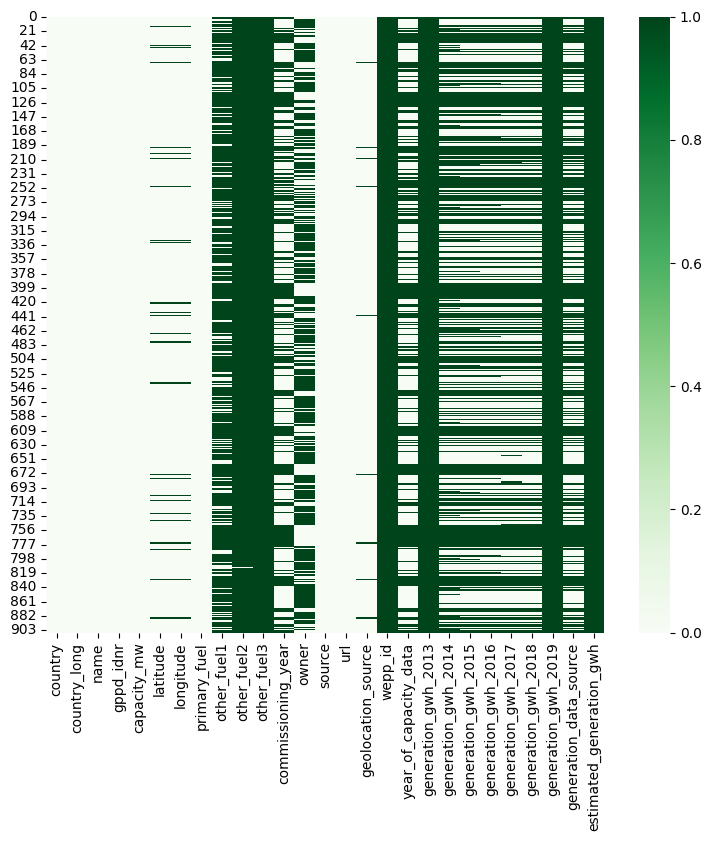

In [26]:
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Greens')

Yes there are a lot of null values in the data set 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [28]:
#Checking for duplicates

dupli = df[df.duplicated()]
print("All the Duplicate Rows are: ")

dupli

All the Duplicate Rows are: 


Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]

There are no duplicate values in the dataset 

# 5) Removing all the columns with null values 

In [29]:
df.drop('other_fuel2',axis=1,inplace=True) #906 NAN values
df.drop('other_fuel3',axis=1,inplace=True) #907 NAN values
df.drop('wepp_id',axis=1,inplace=True) #907 NAN values 
df.drop('generation_gwh_2013',axis=1,inplace=True) #907 NAN values
df.drop('generation_gwh_2019',axis=1,inplace=True) #907 NAN values 
df.drop('estimated_generation_gwh',axis=1,inplace=True) #907 NAN values

We will now use Simple Imputer to normalise the data. Simple imputer will help us add on the missing values using simple technqiues like mean, most frequent, median etc 

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
simp_int =SimpleImputer(strategy='mean')
simp_object=SimpleImputer(strategy='most_frequent')

In [32]:
#Different column types will be imputed seperately 

list_int=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
list_object=['other_fuel1','owner','geolocation_source','generation_data_source']


In [33]:
for x in list_int:
    df[x]=simp_int.fit_transform(df[x].values.reshape(-1,1))

In [34]:
for x in list_object:
    df[x]=simp_object.fit_transform(df[x].values.reshape(-1,1))

ValueError: 2

In [35]:
#Now we will check the null values again after imputing 

df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

Now we can see from above that the dataset has no null values 

# 6) EDA and checking for unique values

In [36]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

Some of the columns have only 1 unique value and we will be dropping these values to further help with our analysis

In [37]:
df.drop('country',axis=1,inplace=True)
df.drop('country_long',axis=1,inplace=True)
df.drop('year_of_capacity_data',axis=1,inplace=True)
df.drop('generation_data_source',axis=1,inplace=True)

In [38]:
df.nunique()

name                   907
gppd_idnr              907
capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      74
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

Hence all the columns with only 1 unique value are removed 

<br><font face = "Times New Roman" size = "3"> <b> Checking unique values for a few columns 

In [39]:
#Primary Fuels Column

print(df['primary_fuel'].unique())
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64


In [40]:
#Geolocation Column 

print(df['geolocation_source'].unique())
print(df['geolocation_source'].value_counts())

['National Renewable Energy Laboratory' 'WRI' nan 'Industry About']
geolocation_source
WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


In [ ]:
#Other Fuel Column

print(df['other_fuel1'].unique())
print(df['other_fuel1'].value_counts())

['Oil' 'Cogeneration' 'Gas']
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


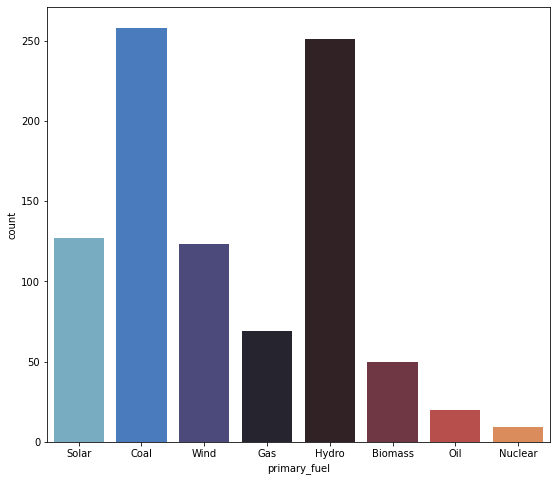

In [ ]:
#Countplot for Primary Fuel Column 

plt.figure(figsize=(9,8))
sns.countplot(df['primary_fuel'],palette='icefire');

<br><font face = "Muller Text" size = "3"> <b> We will compare Primary fuel with Other fuels and also with the geolocation source of this fuel

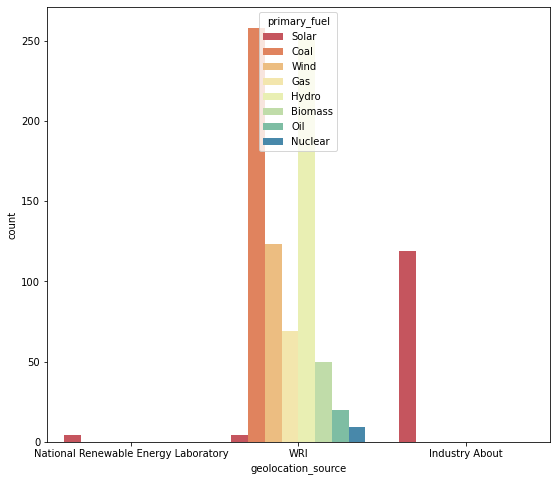

In [ ]:
#Countplot For Geolocation Source

plt.figure(figsize=(9,8))
sns.countplot(df['geolocation_source'],palette='Spectral', hue='primary_fuel',data=df);

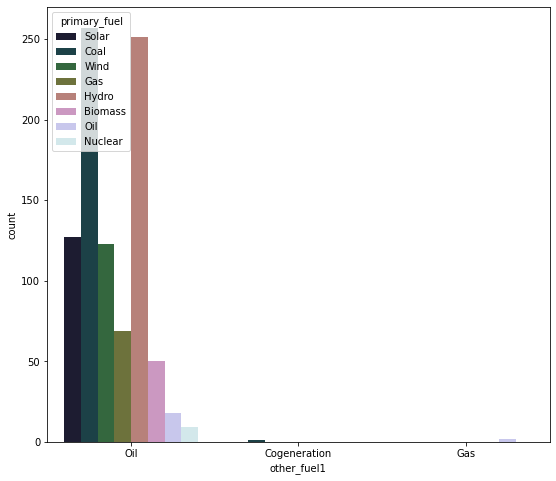

In [ ]:
#Countplot For Other Fuels

plt.figure(figsize=(9,8))
sns.countplot(df['other_fuel1'],palette='cubehelix',hue='primary_fuel',data=df);

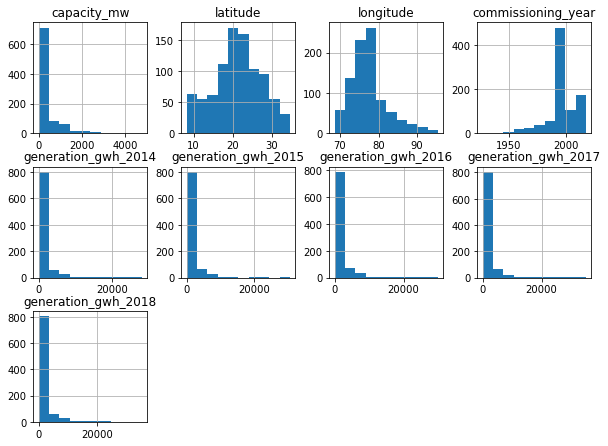

In [ ]:
df.hist(figsize=(10,10),layout=(4,4),sharex=False);

<br><font face = "Muller Text" size = "3"> <b> Primary Fuel is our target variable so we will make some comparisons of it with other columns in order to get a better analysis of the data  

In [ ]:
import plotly.express as px

In [ ]:
px.pie(df,values='capacity_mw',names='primary_fuel',title='Comparison Of Primary Fuel And Its Generation',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 69.6% of Electric power is generated using Coal
2. 15.7% of Electric power is generated using hydro power
3. 8.51% of Electric power is generated using Gases
4. 2.97% of Electric power is generated using Nuclear Energy 

rest percentage of power is generated by other factors such as solar, biomass,wind etc

In [ ]:
px.pie(df,values='generation_gwh_2014',names='primary_fuel',title='Primary Fuel % Generated in 2014',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 45.3% of Electric power that was generated in the year 2014 was using Coal
2. 15.2% of Electric power that was generated in the year 2014 was using Hydro power
3. 14% of Electric power that was generated in the year 2014 was using Solar Energy
4. 13.6% of Electric power that was generated in the year 2014 was using Wind Energy 

And the rest of the energy generated in gigawatt-hours was done by biomass, gas ,nuclear and oil

In [ ]:
px.pie(df,values='generation_gwh_2015',names='primary_fuel',title='Primary Fuel % Generated in 2015',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 46.3% of Electric power that was generated in the year 2015 was using Coal
2. 14.3% of Electric power that was generated in the year 2015 was using Hydro power
3. 14% of Electric power that was generated in the year 2015 was using Solar Energy
4. 13.6% of Electric power that was generated in the year 2015 was using Wind Energy 

And the rest of the energy generated in gigawatt-hours was done by biomass, gas ,nuclear and oil

In [ ]:
px.pie(df,values='generation_gwh_2016',names='primary_fuel',title='Primary Fuel % Generated in 2016',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 47.1% of Electric power that was generated in the year 2016 was using Coal
2. 14% of Electric power that was generated in the year 2016 was using Solar power
3. 13.8% of Electric power that was generated in the year 2016 was using Hydro Power
4. 13.6% of Electric power that was generated in the year 2016 was using Wind Energy 

And the rest of the energy generated in gigawatt-hours was done by biomass, gas ,nuclear and oil

NOTE: We also noticed from the above pie chart that as the years are passing we are seeing an increase in renewable sources of energy


In [ ]:
px.pie(df,values='generation_gwh_2017',names='primary_fuel',title='Primary Fuel % Generated in 2017',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 47.2% of Electric power that was generated in the year 2017 was using Coal
2. 14% of Electric power that was generated in the year 2017 was using Solar power
3. 13.6% of Electric power that was generated in the year 2017 was using Hydro Power
4. 13.1% of Electric power that was generated in the year 2017 was using Wind Energy 

And the rest of the energy generated in gigawatt-hours was done by biomass, gas ,nuclear and oil

NOTE: There is a slight increase in the use of biomass energy. The use of renewable energy is still going up.

In [ ]:
px.pie(df,values='generation_gwh_2018',names='primary_fuel',title='Primary Fuel % Generated in 2018',color_discrete_sequence=px.colors.qualitative.T10)

We can Conclude from the above pie chart that 

1. 47.29% of Electric power that was generated in the year 2018 was using Coal
2. 14% of Electric power that was generated in the year 2018 was using Solar power
3. 13.6% of Electric power that was generated in the year 2018 was using Hydro Power
4. 13.2% of Electric power that was generated in the year 2018 was using Wind Energy 

And the rest of the energy generated in gigawatt-hours was done by biomass, gas ,nuclear and oil



<br><font face = "Times New Roman" size = "3"> <b> We will be replacing the columns of our target variable that is Primary Fuel so that we have an easier analysis 

In [41]:
df['primary_fuel']=df['primary_fuel'].replace('Coal',1)
df['primary_fuel']=df['primary_fuel'].replace('Hydro',2)
df['primary_fuel']=df['primary_fuel'].replace('Solar',3)
df['primary_fuel']=df['primary_fuel'].replace('Wind',4)
df['primary_fuel']=df['primary_fuel'].replace('Biomass',5)
df['primary_fuel']=df['primary_fuel'].replace('Oil',6)
df['primary_fuel']=df['primary_fuel'].replace('Nuclear',7)
df['primary_fuel']=df['primary_fuel'].replace('Gas',8)

In [42]:
df['primary_fuel']

0      3
1      1
2      4
3      8
4      1
      ..
902    1
903    3
904    4
905    1
906    4
Name: primary_fuel, Length: 907, dtype: int64

In [43]:
df.describe().T

count         mean          std        min          25%   
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000  \
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     2.886439     2.005319     1.0000     1.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            2.000000     4.000000      8.000  
commissioning_year   1997.091082  2003.000000   2018.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

# 7) Encoding 

Encoding here will help us to convert the data into numerical value that is easier to fit in the machine learning model

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
dff = df.drop('primary_fuel',axis=1)
dff= dff.apply(LabelEncoder().fit_transform)
dff['primary_fuel']= df['primary_fuel']

In [46]:
dff

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1   
0       0        657            9       731        143            3  \
1       1        519          177       594        234            3   
2       2        853          121       420          8            3   
3       3          0          200       547        806            3   
4       4          1          340       423        702            2   
..    ...        ...          ...       ...        ...          ...   
902   902        491          336       176        480            2   
903   903        822           10       104        553            3   
904   904        891           81       151        311            3   
905   905        539          167       572        167            3   
906   906        876           56        32        495            3   

     commissioning_year  owner  source  url  geolocation_source   
0                    66    229     109  128                   1  \
1                    52    258     174  173                   2   
2                    52      2      21  205                   2   
3                    59    280      22   58                   2   
4                    70    280      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902                  71    280      22   58                   2   
903                  52    114      77   22                   0   
904                  52    280      21  260                   2   
905                  52     91      59   82                   2   
906                  52    279      21  245                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016   
0                    250                  265                  268  \
1                    250                  265                  268   
2                    250                  265                  268   
3                    156                  196                  197   
4                    272                  349                  360   
..                   ...                  ...                  ...   
902                  250                    3                   99   
903                  250                  265                  268   
904                  250                  265                  268   
905                  250                  265                  268   
906                  250                  265                  268   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                    270                  272             3  
1                    270                  272             1  
2                    270                  272             4  
3                    176                  174             8  
4                    339                  374             1  
..                   ...                  ...           ...  
902                  193                  182             1  
903                  270                  272             3  
904                  270                  272             4  
905                  270                  272             1  
906                  270                  272             4  

[907 rows x 17 columns]

# 8) Correlation

Correlation will tell us about how the various columns or most importantly are target column is related to other columns 

It is important to remove the highly correlated values if any because that will ease our analysis during training and testing the dataset 

In [47]:
dff.corr()

name  gppd_idnr  capacity_mw  latitude  longitude   
name                 1.000000   0.332205     0.014618 -0.137213   0.036612  \
gppd_idnr            0.332205   1.000000    -0.563732 -0.100372  -0.395432   
capacity_mw          0.014618  -0.563732     1.000000  0.078279   0.344733   
latitude            -0.137213  -0.100372     0.078279  1.000000  -0.044093   
longitude            0.036612  -0.395432     0.344733 -0.044093   1.000000   
other_fuel1         -0.035180   0.367177    -0.627908 -0.034861  -0.318160   
commissioning_year  -0.041292   0.053931     0.260712  0.088759   0.089778   
owner                0.117954  -0.602038     0.461603  0.005014   0.286588   
source              -0.014640   0.416384    -0.392096  0.053914  -0.273287   
url                  0.041917   0.597080    -0.348166 -0.127709  -0.309979   
geolocation_source   0.045882  -0.410443     0.390773 -0.208658   0.304769   
generation_gwh_2014  0.047783   0.346833    -0.006148  0.066206  -0.127436   
generation_gwh_2015  0.031430   0.340109    -0.011158  0.059281  -0.142959   
generation_gwh_2016  0.028378   0.315496     0.009683  0.085754  -0.091117   
generation_gwh_2017  0.046151   0.306688     0.012681  0.048666  -0.111920   
generation_gwh_2018  0.030928   0.310391    -0.000765  0.050687  -0.118664   
primary_fuel         0.003540   0.203098    -0.189441 -0.175375  -0.255793   

                     other_fuel1  commissioning_year     owner    source   
name                   -0.035180           -0.041292  0.117954 -0.014640  \
gppd_idnr               0.367177            0.053931 -0.602038  0.416384   
capacity_mw            -0.627908            0.260712  0.461603 -0.392096   
latitude               -0.034861            0.088759  0.005014  0.053914   
longitude              -0.318160            0.089778  0.286588 -0.273287   
other_fuel1             1.000000           -0.320854 -0.324999  0.254138   
commissioning_year     -0.320854            1.000000 -0.028080  0.026775   
owner                  -0.324999           -0.028080  1.000000 -0.243587   
source                  0.254138            0.026775 -0.243587  1.000000   
url                     0.269084            0.016463 -0.190672  0.160144   
geolocation_source     -0.182347           -0.003159  0.398212 -0.491984   
generation_gwh_2014    -0.137642            0.171476 -0.251062  0.196322   
generation_gwh_2015    -0.119752            0.159862 -0.252819  0.197696   
generation_gwh_2016    -0.162941            0.198602 -0.253050  0.197876   
generation_gwh_2017    -0.171106            0.160149 -0.255311  0.199645   
generation_gwh_2018    -0.146271            0.153997 -0.264549  0.206869   
primary_fuel            0.400053            0.011296 -0.097583  0.106837   

                          url  geolocation_source  generation_gwh_2014   
name                 0.041917            0.045882             0.047783  \
gppd_idnr            0.597080           -0.410443             0.346833   
capacity_mw         -0.348166            0.390773            -0.006148   
latitude            -0.127709           -0.208658             0.066206   
longitude           -0.309979            0.304769            -0.127436   
other_fuel1          0.269084           -0.182347            -0.137642   
commissioning_year   0.016463           -0.003159             0.171476   
owner               -0.190672            0.398212            -0.251062   
source               0.160144           -0.491984             0.196322   
url                  1.000000            0.031037             0.207868   
geolocation_source   0.031037            1.000000            -0.140864   
generation_gwh_2014  0.207868           -0.140864             1.000000   
generation_gwh_2015  0.209323           -0.141849             0.856488   
generation_gwh_2016  0.209513           -0.141979             0.831844   
generation_gwh_2017  0.211386           -0.143248             0.765011   
generation_gwh_2018  0.219035           -0.148431             0.784

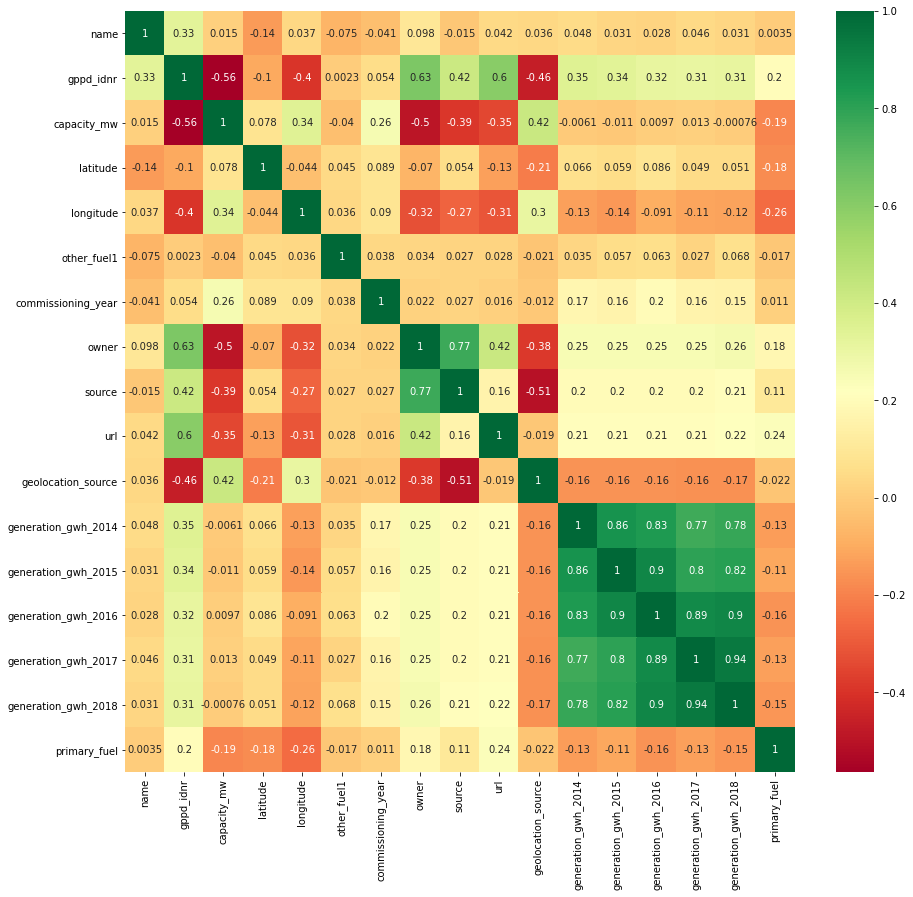

In [ ]:
plt.figure(figsize=(15,14))
sns.heatmap(dff.corr(),annot=True,cmap='RdYlGn');

Observations we can make from the above heatmap is 

1. capacity_mw has high negative correlation with gppd_idnr column 
2. longitude has high negative correaltion with gppd_idnr column 
3. geolocation_source has high negative correlation with gppd_idnr column 
4. gppd_idnr and owner have high negative correlation with capacity_mw column 
5. owner and url variable has high postive correlation with gppd_idnr
6. source also has high postive correlation with owner 
7. all the generation_gwh columns from the year 2014 to 2018 have positive correlation with each other 

In [48]:
df_targv=dff.corr()
df_targv['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
other_fuel1            0.400053
url                    0.235336
gppd_idnr              0.203098
source                 0.106837
commissioning_year     0.011296
name                   0.003540
geolocation_source    -0.008116
owner                 -0.097583
generation_gwh_2015   -0.107072
generation_gwh_2017   -0.127337
generation_gwh_2014   -0.132839
generation_gwh_2018   -0.153036
generation_gwh_2016   -0.160440
latitude              -0.175375
capacity_mw           -0.189441
longitude             -0.255793
Name: primary_fuel, dtype: float64

# 9) Further visualisation with encoded and correlated data 

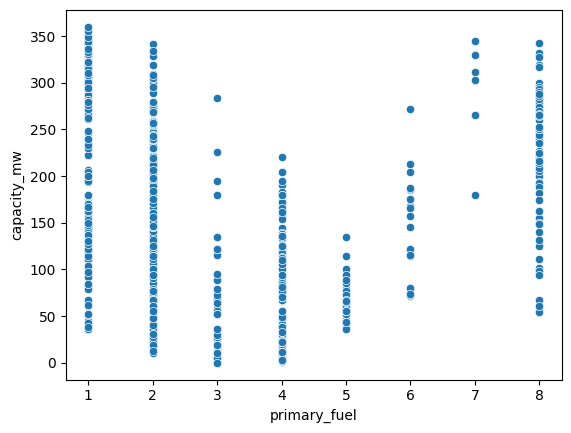

In [49]:
sns.scatterplot(dff['primary_fuel'],dff['capacity_mw'],palette='magma');

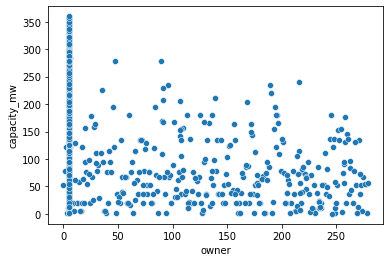

In [ ]:
sns.scatterplot(dff['owner'],dff['capacity_mw'],palette='deep');

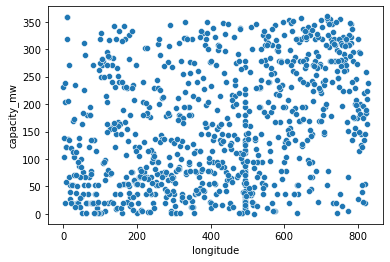

In [ ]:
sns.scatterplot(dff['longitude'],dff['capacity_mw'],palette='magma');

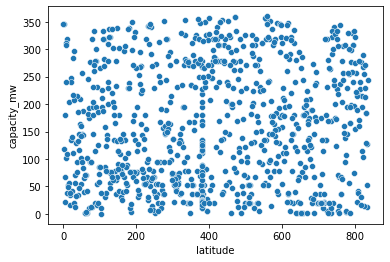

In [ ]:
sns.scatterplot(dff['latitude'],dff['capacity_mw'],palette='magma');

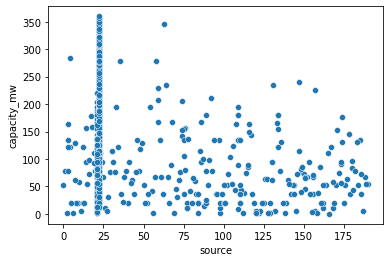

In [ ]:
sns.scatterplot(dff['source'],dff['capacity_mw'],palette='magma');

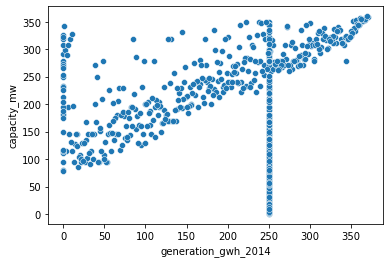

In [ ]:
sns.scatterplot(dff['generation_gwh_2014'],dff['capacity_mw'],palette='deep');

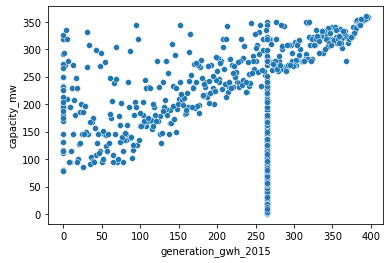

In [ ]:
sns.scatterplot(dff['generation_gwh_2015'],dff['capacity_mw'],palette='deep');

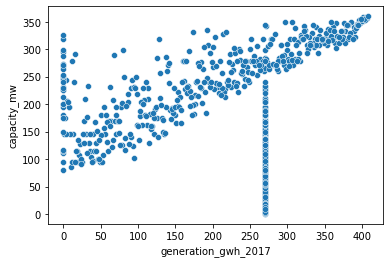

In [ ]:
sns.scatterplot(dff['generation_gwh_2017'],dff['capacity_mw'],palette='magma');

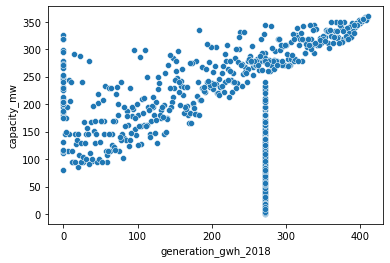

In [ ]:

sns.scatterplot(dff['generation_gwh_2018'],dff['capacity_mw'],palette='magma');

# 10) Balancing and splitting the dataset 

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
dfx=dff.iloc[:,0:-1]
dfy=dff.iloc[:,-1]

In [52]:
sme=SMOTE()

In [53]:
train_x,train_y=sme.fit_resample(dfx,dfy)

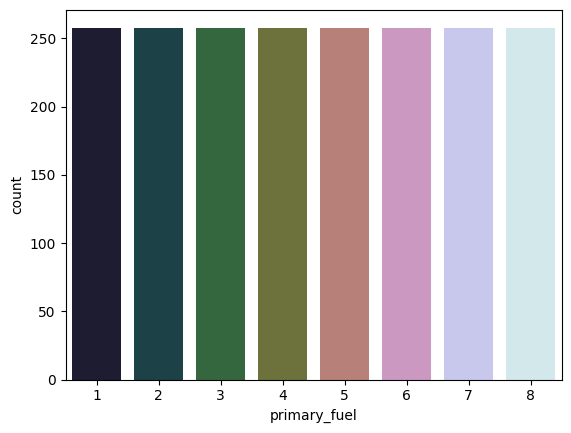

In [54]:
sns.countplot(train_y,palette='cubehelix');

In [55]:
dftr= train_x

In [56]:
dftr['primary_fuel']= train_y

In [57]:
dftr.head()

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1   
0     0        657            9       731        143            3  \
1     1        519          177       594        234            3   
2     2        853          121       420          8            3   
3     3          0          200       547        806            3   
4     4          1          340       423        702            2   

   commissioning_year  owner  source  url  geolocation_source   
0                  66    229     109  128                   1  \
1                  52    258     174  173                   2   
2                  52      2      21  205                   2   
3                  59    280      22   58                   2   
4                  70    280      22   58                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016   
0                  250                  265                  268  \
1                  250                  265                  268   
2                  250                  265                  268   
3                  156                  196                  197   
4                  272                  349                  360   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                  270                  272             3  
1                  270                  272             1  
2                  270                  272             4  
3                  176                  174             8  
4                  339                  374             1

In [58]:
dftr.shape

(2064, 17)

# 11) Checking and removing Outliers

it is important for us to look for Outliers in this train split so that we can remove them

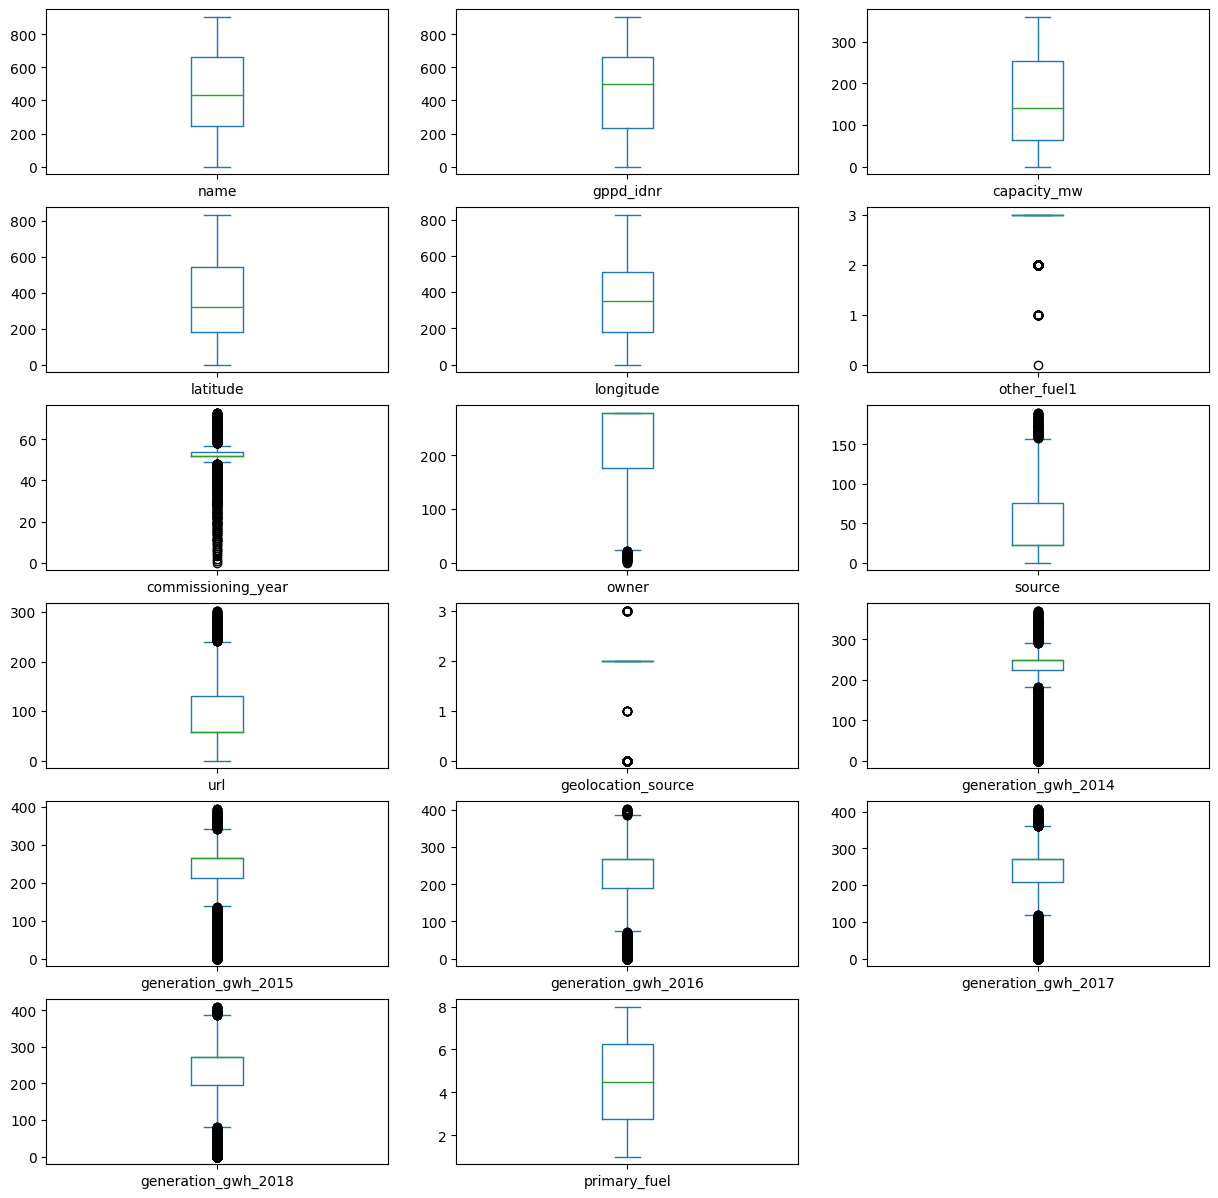

In [59]:
dftr.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,15));

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(dftr))

In [61]:
print(np.where(z>3))

(array([  78,   90,  169,  170,  219,  221,  222,  254,  261,  294,  342,
        371,  377,  444,  450,  454,  469,  475,  478,  479,  484,  495,
        509,  522,  531,  538,  541,  573,  583,  588,  592,  601,  621,
        649,  677,  694,  706,  709,  713,  728,  781,  807,  811,  813,
        817,  817,  848,  870,  871,  913, 1389, 1412, 1416, 1416, 1421,
       1424, 1429, 1437, 1438, 1444, 1444, 1453, 1462, 1482, 1490, 1492,
       1512, 1532, 1535, 1560, 1584, 1609, 1610, 1614, 1621, 1622, 1622,
       1623, 1623]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 9, 9, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6]))


In [62]:
df_new=dftr[(z<3).all(axis=1)]

In [63]:
df_new.shape

(1990, 17)

# 12) Variance Inflation Factor

As we know VIF tells us about how are target variable which is primary fuel in this case is affected by the other individual correlated values 

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
x= df_new.drop('primary_fuel',axis=1)

In [66]:
y=df_new['primary_fuel']

In [67]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']= x.columns
    vif['VIF Factor']=  [variance_inflation_factor(x.values,i) for i in range(0,x.shape[1])]
    return vif

In [68]:
vif()

Variables  VIF Factor
0                  name    7.731066
1             gppd_idnr   30.892412
2           capacity_mw    9.116293
3              latitude    4.104117
4             longitude    5.028584
5           other_fuel1   41.327592
6    commissioning_year   39.631725
7                 owner   19.149277
8                source    3.550812
9                   url    8.763253
10   geolocation_source   13.690099
11  generation_gwh_2014   39.054521
12  generation_gwh_2015   66.604590
13  generation_gwh_2016   81.650648
14  generation_gwh_2017   43.526844
15  generation_gwh_2018   71.366518

We can notice from the above table that

1. VIF is the same for latitude,longitude , name ,geolocation source and commisioning year so we will drop latitude, longitude and even name 

2. It is also observed that owner and gwh also has same vif so one of them will be dropped too  

In [69]:
x.drop('latitude',axis=1,inplace=True)
x.drop('longitude',axis=1,inplace=True)
x.drop('name',axis=1,inplace=True)
x.drop('owner',axis=1,inplace=True)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

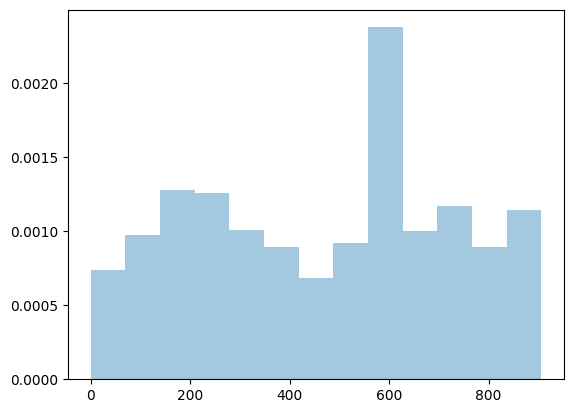

In [70]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

We can see that the outliers are removed and that data is now almost ready for model building

# 13) Checking skew and scaling the data 

In [71]:
x.skew().sort_values(ascending=False) 

source                 1.314048
url                    1.300490
capacity_mw            0.294841
gppd_idnr             -0.102933
commissioning_year    -0.253358
generation_gwh_2016   -1.177029
generation_gwh_2018   -1.187726
generation_gwh_2017   -1.213339
generation_gwh_2015   -1.310966
generation_gwh_2014   -1.411836
geolocation_source    -2.087095
other_fuel1           -2.331739
dtype: float64

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scale=MinMaxScaler()

In [74]:
x=scale.fit_transform(x)

# 14) Model Selection 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [76]:
lg=LogisticRegression()
gbc=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()
mnb=MultinomialNB()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
svc=SVC()
abc=AdaBoostClassifier()


In [78]:
list_model=[lg,gbc,dtc,mnb,knc,rfc,svc,abc]

In [79]:
# LogisticRegression
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='RdYlGn', square=True)
    plt.xlabel("predicted")
    plt.show()

In [80]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.916247906197655 Random State : 71


accuracy_score:- 0.8944723618090452
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        65
           2       0.79      0.85      0.82        66
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00        81
           5       0.93      0.85      0.89        73
           6       0.95      0.78      0.85        67
           7       0.97      1.00      0.99        78
           8       0.69      0.74      0.72        80

    accuracy                           0.89       597
   macro avg       0.89      0.89      0.89       597
weighted avg       0.90      0.89      0.90       597



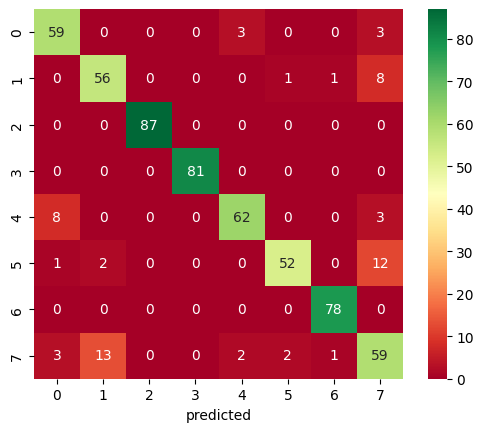

In [81]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [82]:
# GradientBoostingClassifier

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Oranges', square=True)
    plt.xlabel("predicted")
    plt.show()

In [83]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

KeyboardInterrupt: 

accuracy_score:- 0.877104377104377
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        73
           2       0.71      0.74      0.72        57
           3       0.97      1.00      0.99        77
           4       1.00      1.00      1.00        84
           5       0.90      0.90      0.90        73
           6       0.94      0.84      0.89        57
           7       0.99      0.88      0.93       103
           8       0.74      0.81      0.78        70

    accuracy                           0.88       594
   macro avg       0.87      0.87      0.87       594
weighted avg       0.88      0.88      0.88       594



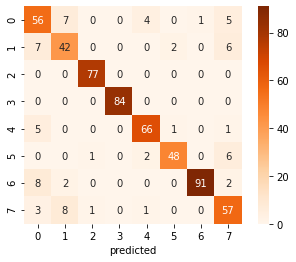

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()


In [ ]:
# DecisionTreeClassifier

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.877104377104377 Random State : 59


accuracy_score:- 0.8518518518518519
              precision    recall  f1-score   support

           1       0.51      0.62      0.56        60
           2       0.70      0.74      0.72        57
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00        80
           5       0.94      0.91      0.93        91
           6       0.87      0.84      0.85        62
           7       0.88      0.88      0.88        66
           8       0.84      0.74      0.78        91

    accuracy                           0.85       594
   macro avg       0.84      0.84      0.84       594
weighted avg       0.86      0.85      0.85       594



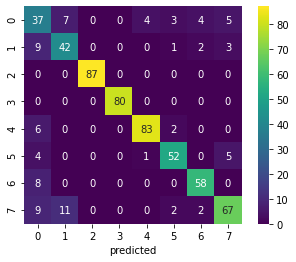

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [ ]:
# MultinomialNB
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='coolwarm', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mnb.fit(x_train,y_train)
    pred=mnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score : ',maxacc,'Random State :',maxrn)

Accuracy Score :  0.6195286195286195 Random State : 32


accuracy_score:- 0.6195286195286195
              precision    recall  f1-score   support

           1       0.39      0.48      0.43        65
           2       0.00      0.00      0.00         0
           3       0.94      1.00      0.97        74
           4       1.00      0.90      0.95        93
           5       0.93      0.55      0.69       124
           6       0.00      0.00      0.00         3
           7       0.70      0.60      0.65       106
           8       0.61      0.36      0.46       129

    accuracy                           0.62       594
   macro avg       0.57      0.49      0.52       594
weighted avg       0.77      0.62      0.67       594



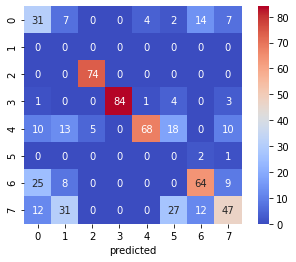

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
confusion_plot()

In [ ]:
# KNeighborsClassifier
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='YlOrBr', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.8737373737373737 Random State : 83


accuracy_score:- 0.8333333333333334
              precision    recall  f1-score   support

           1       0.49      0.76      0.60        41
           2       0.61      0.74      0.67        57
           3       0.98      1.00      0.99        79
           4       1.00      0.95      0.98        87
           5       0.94      0.86      0.90        87
           6       0.90      0.70      0.79        74
           7       0.99      0.88      0.93        90
           8       0.68      0.68      0.68        79

    accuracy                           0.83       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.86      0.83      0.84       594



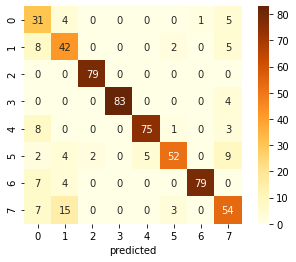

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=57)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()


In [ ]:
#RandomForestClassifer

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Reds', square=True)
    plt.xlabel("predicted")
    plt.show()


In [ ]:

maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.9208754208754208 Random State : 64


accuracy_score:- 0.9023569023569024
              precision    recall  f1-score   support

           1       0.72      0.78      0.75        68
           2       0.76      0.80      0.78        56
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        87
           5       0.98      0.92      0.95        87
           6       0.94      0.91      0.92        74
           7       0.97      0.91      0.94        74
           8       0.81      0.85      0.83        74

    accuracy                           0.90       594
   macro avg       0.90      0.90      0.90       594
weighted avg       0.91      0.90      0.90       594



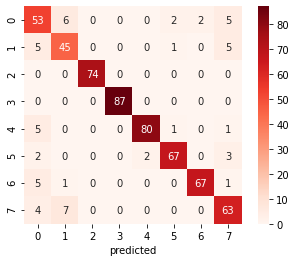

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()


In [ ]:
#SupportVectorClassifer 

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='viridis', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score : ',maxacc,'Random State :',maxrn)

Accuracy Score :  0.8097643097643098 Random State : 64


accuracy_score:- 0.7794612794612794
              precision    recall  f1-score   support

           1       0.44      0.54      0.48        54
           2       0.44      0.84      0.57        32
           3       0.98      1.00      0.99        89
           4       1.00      0.97      0.99        72
           5       0.97      0.76      0.85       109
           6       0.70      0.56      0.62        62
           7       0.95      0.78      0.85       112
           8       0.56      0.67      0.61        64

    accuracy                           0.78       594
   macro avg       0.75      0.77      0.75       594
weighted avg       0.82      0.78      0.79       594



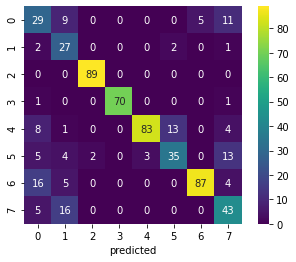

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=83)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()


In [ ]:
#AdaboostClassifer

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()


In [ ]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy Score :',maxacc,'Random State :',maxrn)

Accuracy Score : 0.5993265993265994 Random State : 33


accuracy_score:- 0.43434343434343436
              precision    recall  f1-score   support

           1       0.24      0.18      0.20        95
           2       0.23      0.73      0.35        22
           3       0.94      1.00      0.97        83
           4       1.00      0.92      0.96        74
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.12      0.79      0.21        14
           8       0.94      0.21      0.34       306

    accuracy                           0.43       594
   macro avg       0.43      0.48      0.38       594
weighted avg       0.79      0.43      0.48       594



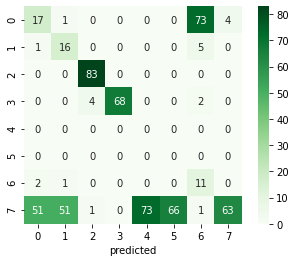

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

# 15) Cross validation and Hyperparameter Tuning 

In [ ]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.7020202  0.69444444 0.71212121 0.67171717 0.66161616]
0.6883838383838384
GradientBoostingClassifier()
[0.83838384 0.82070707 0.88383838 0.86111111 0.85858586]
0.8525252525252526
DecisionTreeClassifier()
[0.77777778 0.81313131 0.87373737 0.83838384 0.83080808]
0.8267676767676766
MultinomialNB()
[0.58333333 0.57070707 0.59848485 0.59343434 0.61363636]
0.591919191919192
KNeighborsClassifier()
[0.83333333 0.81313131 0.83838384 0.8510101  0.84343434]
0.8358585858585859
RandomForestClassifier()
[0.87121212 0.8510101  0.90151515 0.88383838 0.87878788]
0.8772727272727273
SVC()
[0.77272727 0.76010101 0.78787879 0.77272727 0.80050505]
0.7787878787878788
AdaBoostClassifier()
[0.38131313 0.47979798 0.5530303  0.48737374 0.47474747]
0.47525252525252526


<br><font face = "Muller Text" size = "4"> <b>  We can Conclude from above that Random Forest Classifier is the best model 
    


Random foret classifer is considered to be the best model because firstly it has a higher accuracy score than any other model that we have taken under consideration apart from that it has a high random state score which means that the data will have less amount of randomness and this in truth makes the model more efficient and faster than other models. this is why we have considered or taken random forest as our best model. 

In [86]:
#Hyperparamter tuning 

random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}


In [87]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best Score :', rfc_grid.best_score_)
    print('Best Score :', rfc_grid.best_params_)
    print('Best Score :', rfc_grid.best_estimator_)


Best Score : 0.9045436287232728
Best Score : {'criterion': 'gini', 'max_features': 'auto'}
Best Score : RandomForestClassifier()
Best Score : 0.9095630372492837
Best Score : {'criterion': 'gini', 'max_features': 'log2'}
Best Score : RandomForestClassifier(max_features='log2')
Best Score : 0.9102962791057477
Best Score : {'criterion': 'entropy', 'max_features': 'auto'}
Best Score : RandomForestClassifier(criterion='entropy')
Best Score : 0.911002787232993
Best Score : {'criterion': 'gini', 'max_features': 'log2'}
Best Score : RandomForestClassifier(max_features='log2')
Best Score : 0.9138549892318736
Best Score : {'criterion': 'gini', 'max_features': 'sqrt'}
Best Score : RandomForestClassifier(max_features='sqrt')
Best Score : 0.9181527093596059
Best Score : {'criterion': 'gini', 'max_features': 'auto'}
Best Score : RandomForestClassifier()
Best Score : 0.9167760554857328
Best Score : {'criterion': 'entropy', 'max_features': 'auto'}
Best Score : RandomForestClassifier(criterion='entropy

# 16) ROC curve 

ROC stands for reciver operating characteristic curve. this graph tells us about the performance of the classification curve on all possible threshold levels. it is a really good visual reprsentation of the selected model and it's working 

In [88]:
pred_prob=rfc_grid.best_estimator_.predict_proba(x_test)

In [89]:
fpr = {}
tpr = {}
thresh ={}

n_class=8

In [94]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i],pos_label=i)
    
                        

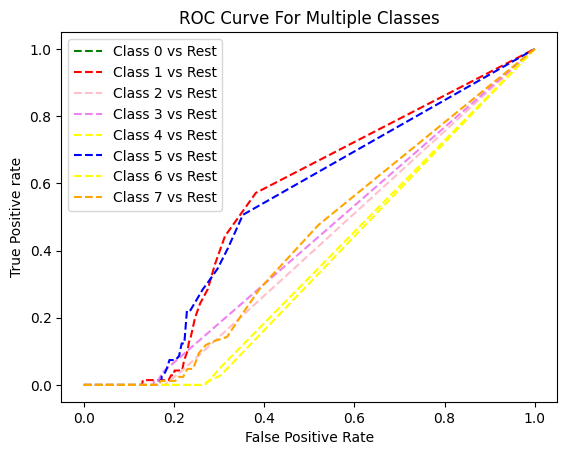

In [95]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='violet', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='orange', label='Class 7 vs Rest')
plt.title('ROC Curve For Multiple Classes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);